<a href="https://colab.research.google.com/github/hrbae/Industrial_Data_Science/blob/main/Code/5_%EA%B8%B0%EC%B4%88%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9D2_%26_%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D%EC%9D%84_%ED%99%9C%EC%9A%A9%ED%95%9C_%EC%A4%91%EA%B3%A0%EC%B0%A8_%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import scipy.stats as st
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_path = "/content/drive/My Drive/Colab Notebooks/Data" 
print(data_path)

/content/drive/My Drive/Colab Notebooks/Data


In [6]:
os.listdir(data_path)

['datasets_19_420_Iris.csv', 'Old_data', 'car.csv']

In [7]:
iris = pd.read_csv(data_path + '/datasets_19_420_Iris.csv')
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# 분산분석

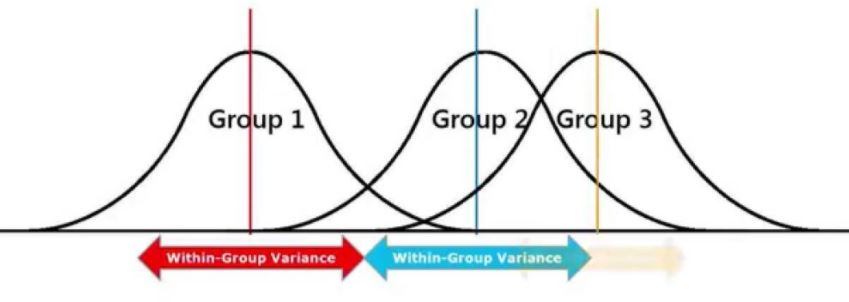

In [8]:
specs = list(iris['Species'].value_counts().index)

by_spec = []
for spec_value in specs:
  print(spec_value)
  by_spec.append(iris.loc[iris['Species']==spec_value,'PetalLengthCm'])

Iris-setosa
Iris-versicolor
Iris-virginica


In [9]:
st.f_oneway(by_spec[0],by_spec[1],by_spec[2])

F_onewayResult(statistic=1179.0343277002194, pvalue=3.0519758018278374e-91)

## 사후분석: ANOVA 분석 수행 중 어느 집단이 서로 차이가 나는지를 분석 하는 절차

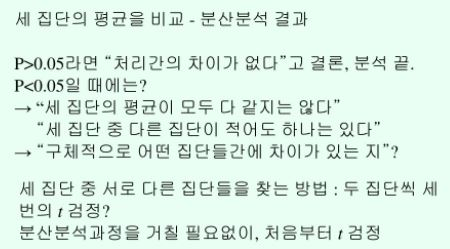

In [10]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
hsd = pairwise_tukeyhsd(iris['PetalLengthCm'],iris['Species'],alpha = 0.05)
hsd.summary()


group1,group2,meandiff,p-adj,lower,upper,reject
Iris-setosa,Iris-versicolor,2.796,0.001,2.5922,2.9998,True
Iris-setosa,Iris-virginica,4.088,0.001,3.8842,4.2918,True
Iris-versicolor,Iris-virginica,1.292,0.001,1.0882,1.4958,True


# 상관분석

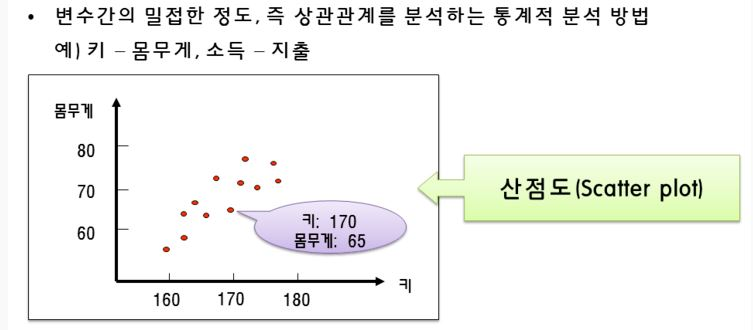

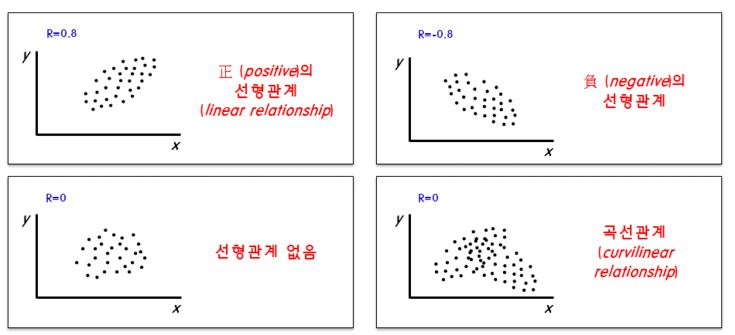

In [11]:
corr = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].corr(method='pearson')
print(corr)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


In [12]:
col = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

for col1 in col:
  for col2 in col:
    corr,p= st.pearsonr(iris[col1],iris[col2])
    print("{}와 {} 사이의 상관계수는 {:2f}이고, p-value는 {:2f}입니다".format(col1, col2, corr,p))

SepalLengthCm와 SepalLengthCm 사이의 상관계수는 1.000000이고, p-value는 0.000000입니다
SepalLengthCm와 SepalWidthCm 사이의 상관계수는 -0.109369이고, p-value는 0.182765입니다
SepalLengthCm와 PetalLengthCm 사이의 상관계수는 0.871754이고, p-value는 0.000000입니다
SepalLengthCm와 PetalWidthCm 사이의 상관계수는 0.817954이고, p-value는 0.000000입니다
SepalWidthCm와 SepalLengthCm 사이의 상관계수는 -0.109369이고, p-value는 0.182765입니다
SepalWidthCm와 SepalWidthCm 사이의 상관계수는 1.000000이고, p-value는 0.000000입니다
SepalWidthCm와 PetalLengthCm 사이의 상관계수는 -0.420516이고, p-value는 0.000000입니다
SepalWidthCm와 PetalWidthCm 사이의 상관계수는 -0.356544이고, p-value는 0.000008입니다
PetalLengthCm와 SepalLengthCm 사이의 상관계수는 0.871754이고, p-value는 0.000000입니다
PetalLengthCm와 SepalWidthCm 사이의 상관계수는 -0.420516이고, p-value는 0.000000입니다
PetalLengthCm와 PetalLengthCm 사이의 상관계수는 1.000000이고, p-value는 0.000000입니다
PetalLengthCm와 PetalWidthCm 사이의 상관계수는 0.962757이고, p-value는 0.000000입니다
PetalWidthCm와 SepalLengthCm 사이의 상관계수는 0.817954이고, p-value는 0.000000입니다
PetalWidthCm와 SepalWidthCm 사이의 상관계수는 -0.356544이고, p-value는 0.000008입니다

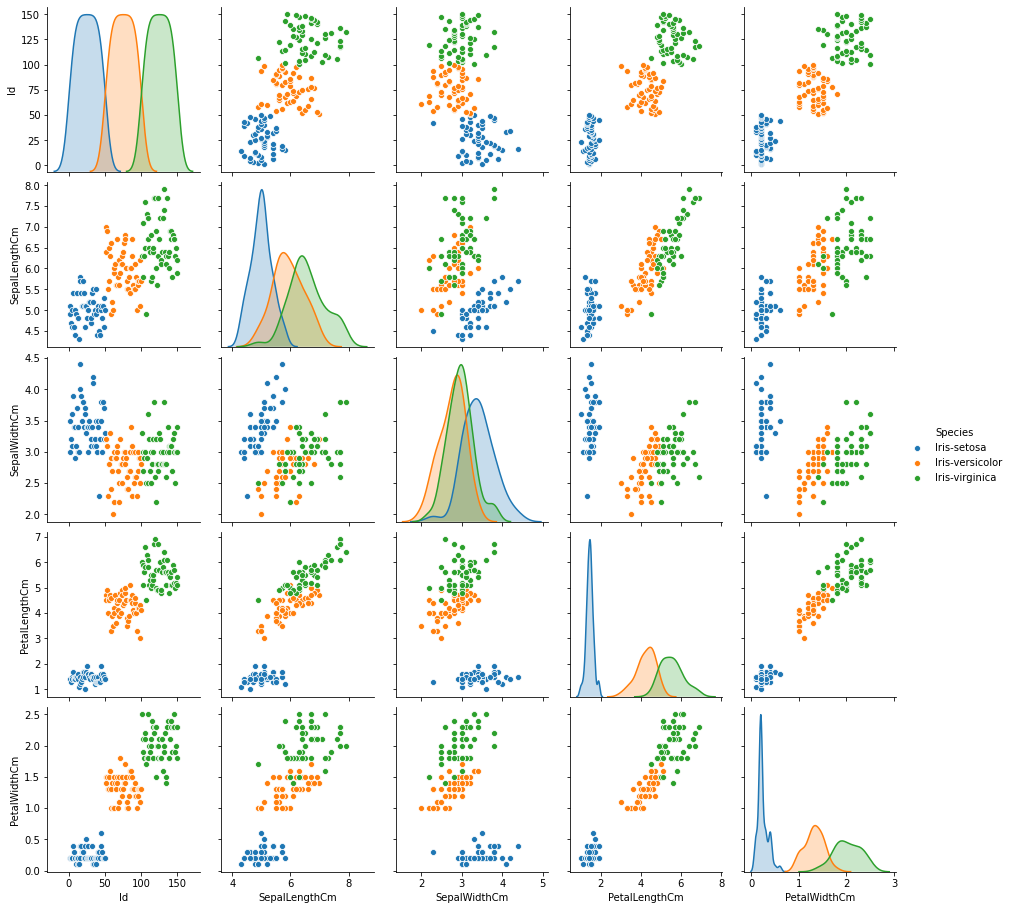

In [ ]:
import seaborn as sns
sns.pairplot(iris, hue="Species")

# 데이터 분석 절차 소개: SEMMA

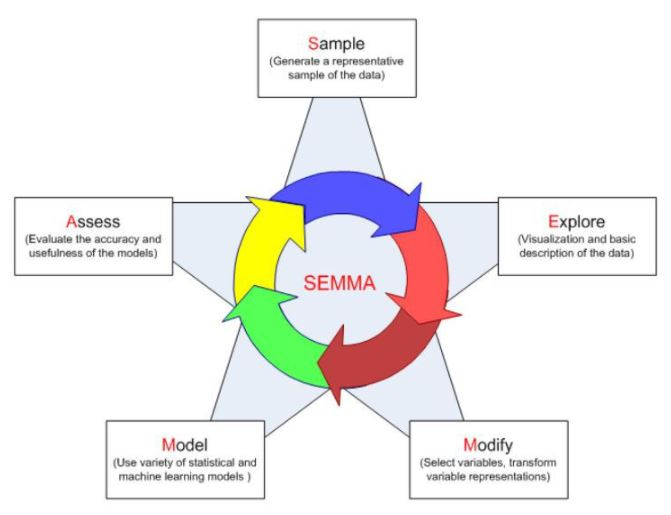

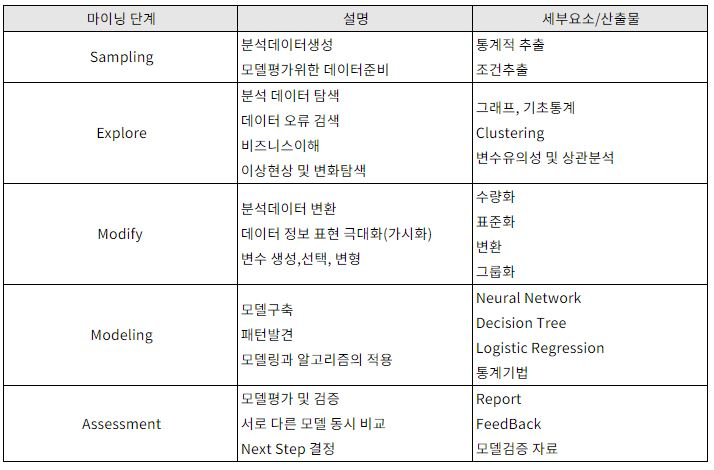

# Sklearn로 회귀 모형 구현하기

In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
from sklearn.linear_model import LinearRegression
from google.colab import drive

In [ ]:
drive.mount('/content/gdriv')

Drive already mounted at /content/gdriv; to attempt to forcibly remount, call drive.mount("/content/gdriv", force_remount=True).


In [ ]:
data_path = "/content/gdriv/My Drive/Colab Notebooks/Data" 
print(data_path)

/content/gdriv/My Drive/Colab Notebooks/Data


In [14]:
os.listdir(data_path)

['datasets_19_420_Iris.csv', 'Old_data', 'car.csv', 'test_car.csv']

In [15]:
data = pd.read_csv(data_path + '/car.csv')

In [16]:
data.head()

,Year,Kilometers_Driven,Fuel_Type,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Maker,Price
0,2015,41000,Diesel,First,19.67,1582,126.20,5.0,NaN,Hyundai,12.50
1,2011,46000,Petrol,First,18.20,1199,88.70,5.0,8.61,Honda,4.50
2,2012,87000,Diesel,First,20.77,1248,88.76,7.0,NaN,Maruti,6.00
3,2013,40670,Diesel,Second,15.20,1968,140.80,5.0,NaN,Audi,17.74
4,2013,86999,Diesel,First,23.08,1461,63.10,5.0,NaN,Nissan,3.50


# Sampling: 특정 조건 데이터를 추출하는 단계

> Stpe1: Missing이 없는 데이터를 추출하기

> Step2: 학습을 위한 데이터와 검증을 위한 데이터로 분리하기


In [17]:
sum(data['Maker'].isnull())

0

In [18]:
col = data.columns
print(len(data))

5558


In [19]:
for col_value in col:
  detect_null = sum(data[col_value].isnull())
  print("{}에 포함된 결측값은 {}개 입니다".format(col_value, detect_null))

Year에 포함된 결측값은 0개 입니다
Kilometers_Driven에 포함된 결측값은 0개 입니다
Fuel_Type에 포함된 결측값은 0개 입니다
Owner_Type에 포함된 결측값은 0개 입니다
Mileage에 포함된 결측값은 0개 입니다
Engine에 포함된 결측값은 0개 입니다
Power에 포함된 결측값은 0개 입니다
Seats에 포함된 결측값은 2개 입니다
New_Price에 포함된 결측값은 4785개 입니다
Maker에 포함된 결측값은 0개 입니다
Price에 포함된 결측값은 0개 입니다


In [20]:
notnull_col = []
for col_value in col:
  detect_null = sum(data[col_value].isnull())
  if detect_null < 100:
    notnull_col.append(col_value)

print(notnull_col)

['Year', 'Kilometers_Driven', 'Fuel_Type', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Maker', 'Price']


In [21]:
data_without_null = data.loc[:,notnull_col]

In [25]:
data_without_null.notnull()

,Year,Kilometers_Driven,Fuel_Type,Owner_Type,Mileage,Engine,Power,Seats,Maker,Price
0,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...
5553,True,True,True,True,True,True,True,True,True,True
5554,True,True,True,True,True,True,True,True,True,True
5555,True,True,True,True,True,True,True,True,True,True
5556,True,True,True,True,True,True,True,True,True,True


In [26]:
data_without_null.notnull()
for col_value in notnull_col:
  data_without_null = data_without_null.loc[data_without_null[col_value].notnull(),:]

In [27]:
for col_value in notnull_col:
  detect_null = sum(data_without_null[col_value].isnull())
  print("{}에 포함된 결측값은 {}개 입니다".format(col_value, detect_null))

Year에 포함된 결측값은 0개 입니다
Kilometers_Driven에 포함된 결측값은 0개 입니다
Fuel_Type에 포함된 결측값은 0개 입니다
Owner_Type에 포함된 결측값은 0개 입니다
Mileage에 포함된 결측값은 0개 입니다
Engine에 포함된 결측값은 0개 입니다
Power에 포함된 결측값은 0개 입니다
Seats에 포함된 결측값은 0개 입니다
Maker에 포함된 결측값은 0개 입니다
Price에 포함된 결측값은 0개 입니다


In [24]:
print("결측 제거로 인한 데이터 손실률은 {:4f}%입니다".format((len(data_without_null)/len(data)*100)))

결측 제거로 인한 데이터 손실률은 99.964016%입니다


In [28]:
data = data_without_null
data.head()

,Year,Kilometers_Driven,Fuel_Type,Owner_Type,Mileage,Engine,Power,Seats,Maker,Price
0,2015,41000,Diesel,First,19.67,1582,126.20,5.0,Hyundai,12.50
1,2011,46000,Petrol,First,18.20,1199,88.70,5.0,Honda,4.50
2,2012,87000,Diesel,First,20.77,1248,88.76,7.0,Maruti,6.00
3,2013,40670,Diesel,Second,15.20,1968,140.80,5.0,Audi,17.74
4,2013,86999,Diesel,First,23.08,1461,63.10,5.0,Nissan,3.50


In [29]:
print(data.dtypes)

Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Owner_Type            object
Mileage              float64
Engine                 int64
Power                float64
Seats                float64
Maker                 object
Price                float64
dtype: object


In [30]:
data['Year'] = data['Year'].astype('object') 
data['Seats'] = data['Seats'].astype('object') 



In [31]:
data.dtypes

Year                  object
Kilometers_Driven      int64
Fuel_Type             object
Owner_Type            object
Mileage              float64
Engine                 int64
Power                float64
Seats                 object
Maker                 object
Price                float64
dtype: object

## Dummy Variable을 이용해서 Categorical Variable 처리하기

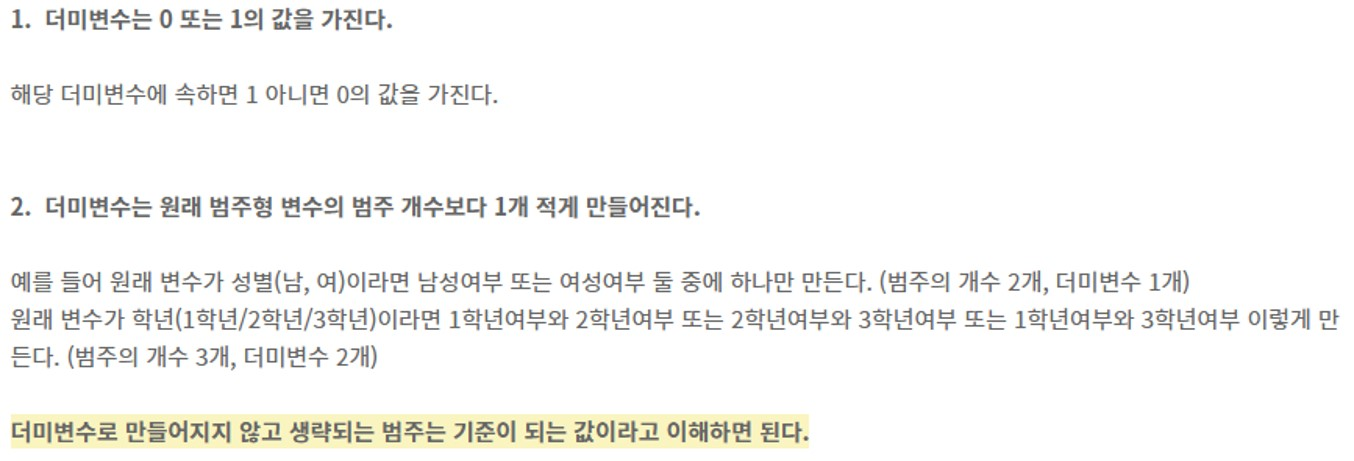

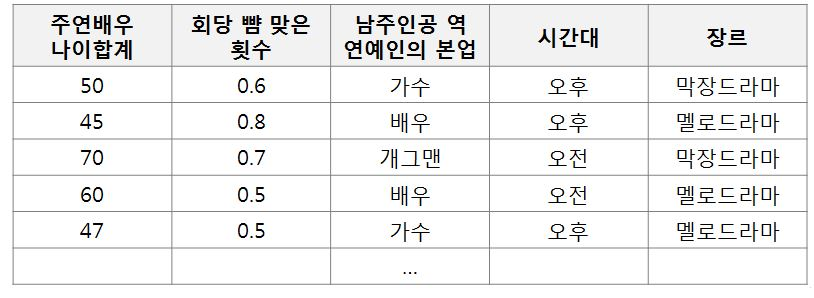

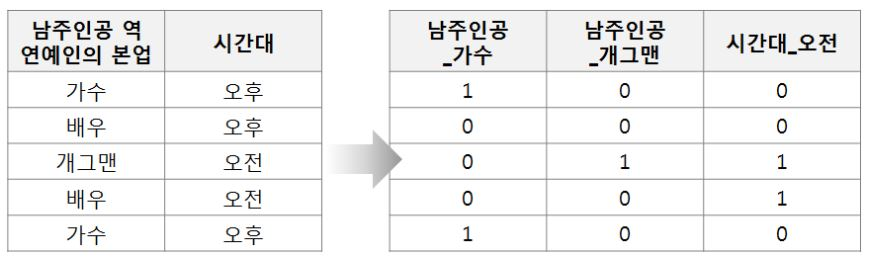

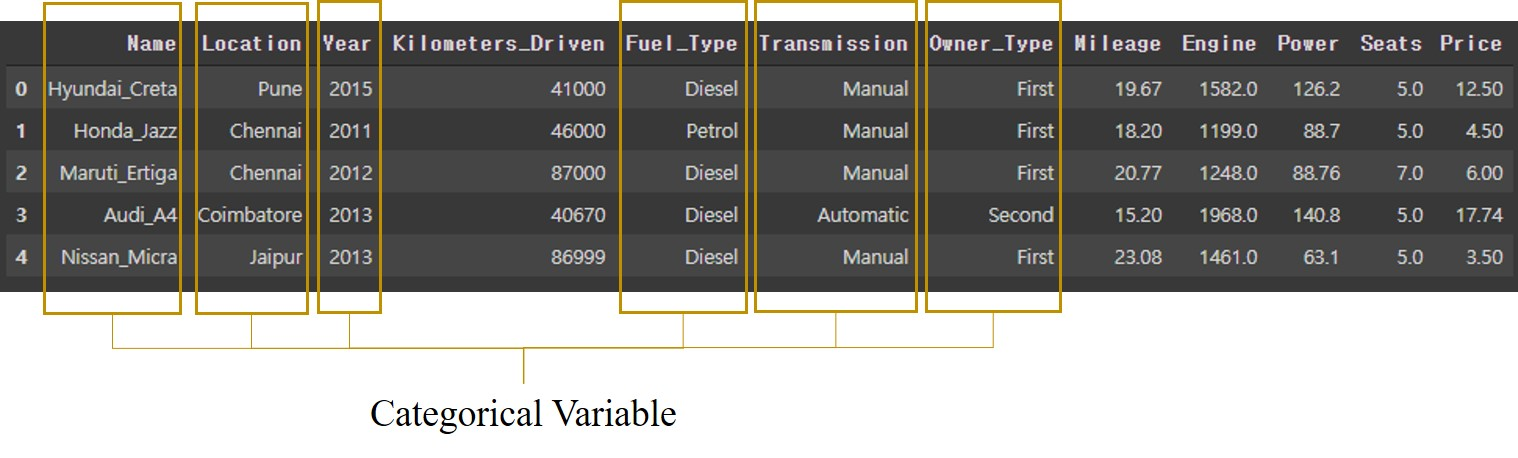

In [32]:
data['Year'] = pd.Categorical(data['Year'])
data['Seats'] = pd.Categorical(data['Seats'])

In [33]:
data = pd.get_dummies(data,prefix_sep='_',drop_first=True)
data.head()

,Kilometers_Driven,Mileage,Engine,Power,Price,Year_1999,Year_2000,Year_2001,Year_2002,Year_2003,...,Maker_Mini,Maker_Mitsubishi,Maker_Nissan,Maker_Porsche,Maker_Renault,Maker_Skoda,Maker_Tata,Maker_Toyota,Maker_Volkswagen,Maker_Volvo
0,41000,19.67,1582,126.20,12.50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,46000,18.20,1199,88.70,4.50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,87000,20.77,1248,88.76,6.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40670,15.20,1968,140.80,17.74,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,86999,23.08,1461,63.10,3.50,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
data['Maker_Hyundai'][0]

1

## Dummy Variable 사용의 문제점: 다중공선성(Multicolinearity) 문제 야기

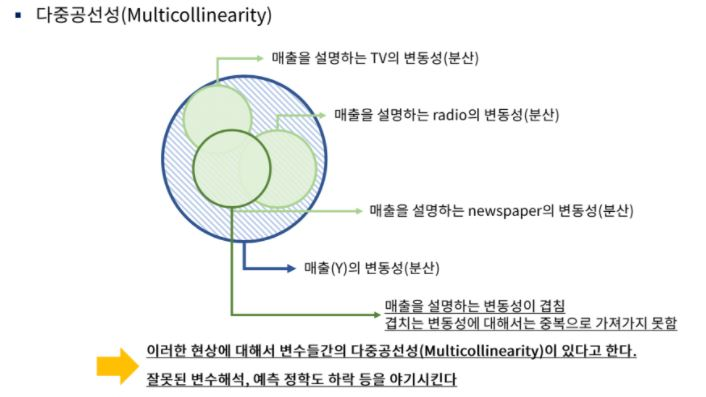

# 학습 데이터와 검증 데이터로 분리

In [34]:
idx = list(data.index)
print(idx)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 219, 220, 221, 222,

In [35]:
np.random.shuffle(idx)
print(idx)

[378, 1111, 3710, 2986, 4191, 156, 3099, 410, 5462, 397, 4322, 506, 961, 1676, 3713, 4496, 2875, 1774, 2379, 438, 4847, 3340, 1996, 1229, 3160, 545, 1752, 2525, 4801, 4124, 2438, 1670, 2872, 5352, 4993, 2192, 4677, 4501, 256, 2377, 2290, 5137, 1003, 4917, 1085, 2096, 3708, 524, 127, 785, 4038, 5127, 3480, 1441, 3425, 4147, 4559, 4117, 1090, 1346, 5237, 3537, 2494, 5182, 696, 4166, 165, 1200, 4243, 5293, 4444, 1934, 3221, 2913, 412, 581, 2303, 1668, 1599, 827, 2350, 2304, 2518, 1503, 1867, 1755, 4210, 2714, 3963, 387, 282, 3773, 2276, 1615, 2684, 1310, 1779, 1926, 4157, 2653, 2698, 4770, 925, 4404, 852, 2749, 1953, 1376, 817, 4205, 4186, 2407, 297, 3162, 4020, 380, 4266, 2416, 2413, 4349, 3321, 2374, 1375, 602, 732, 1986, 5469, 3680, 1830, 687, 352, 3482, 940, 2295, 4542, 4392, 4713, 4511, 2351, 1709, 538, 4893, 3141, 1169, 3098, 4874, 1946, 2667, 3635, 5224, 4852, 3798, 4753, 1306, 2445, 2936, 1643, 3404, 1617, 5396, 1509, 2019, 3652, 219, 3527, 4642, 276, 2500, 3794, 2963, 1172, 3694,

In [36]:
train_idx = idx[:round(len(idx)*0.7)]
test_idx = idx[round(len(idx)*0.7):]
print(len(train_idx))
print(len(test_idx))
print(len(train_idx)+len(test_idx)==len(idx))

3889
1667
True


In [37]:
train = data.loc[train_idx,:].reset_index(drop=True)
test = data.loc[test_idx,:].reset_index(drop=True)
print(train.head())

   Kilometers_Driven  Mileage  Engine  Power  Price  Year_1999  Year_2000  \
0              90207    21.10    1248   73.9   3.91          0          0   
1              79000    18.90     998   67.1   3.00          0          0   
2              49000    16.00    2179  140.0   9.00          0          0   
3              45000    18.44    1198   75.0   1.75          0          0   
4              31271    13.68    2393  147.8  21.42          0          0   

   Year_2001  Year_2002  Year_2003  ...  Maker_Mini  Maker_Mitsubishi  \
0          0          0          0  ...           0                 0   
1          0          0          0  ...           0                 0   
2          0          0          0  ...           0                 0   
3          0          0          0  ...           0                 0   
4          0          0          0  ...           0                 0   

   Maker_Nissan  Maker_Porsche  Maker_Renault  Maker_Skoda  Maker_Tata  \
0             0         

## SKLearn library 이용해서 데이터 분리

In [38]:
from sklearn.model_selection import train_test_split
'''
train_test_split(data, test_size, train_size, random_state, shuffle, stratify)

data : 분할시킬 데이터를 입력 (Python list, Numpy array, Pandas dataframe 등..)

test_size : 테스트 데이터셋의 비율(float)이나 갯수(int) (default = 0.25)

train_size : 학습 데이터셋의 비율(float)이나 갯수(int) (default = test_size의 나머지)

random_state : 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값 (int나 RandomState로 입력)

shuffle : 셔플여부설정 (default = True)

stratify : 지정한 Data의 비율을 유지한다. 예를 들어, Label Set인 Y가 25%의 0과 75%의 1로 이루어진 Binary Set일 때, stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할된다.
'''

train, test = train_test_split(data, train_size = 0.8)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)
print(len(train))
print(len(test))

4444
1112


In [39]:
col = list(train.columns)
print(col)

['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price', 'Year_1999', 'Year_2000', 'Year_2001', 'Year_2002', 'Year_2003', 'Year_2004', 'Year_2005', 'Year_2006', 'Year_2007', 'Year_2008', 'Year_2009', 'Year_2010', 'Year_2011', 'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015', 'Year_2016', 'Year_2017', 'Year_2018', 'Year_2019', 'Fuel_Type_Petrol', 'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third', 'Seats_4.0', 'Seats_5.0', 'Seats_6.0', 'Seats_7.0', 'Seats_8.0', 'Seats_9.0', 'Seats_10.0', 'Maker_Audi', 'Maker_BMW', 'Maker_Bentley', 'Maker_Chevrolet', 'Maker_Datsun', 'Maker_Fiat', 'Maker_Force', 'Maker_Ford', 'Maker_Honda', 'Maker_Hyundai', 'Maker_ISUZU', 'Maker_Isuzu', 'Maker_Jaguar', 'Maker_Jeep', 'Maker_LandRover', 'Maker_Mahindra', 'Maker_Maruti', 'Maker_Mercedes-Benz', 'Maker_Mini', 'Maker_Mitsubishi', 'Maker_Nissan', 'Maker_Porsche', 'Maker_Renault', 'Maker_Skoda', 'Maker_Tata', 'Maker_Toyota', 'Maker_Volkswagen', 'Maker_Volvo']


In [40]:
# Price 삭제 
col.remove('Price')

In [41]:
col

['Kilometers_Driven',
 'Mileage',
 'Engine',
 'Power',
 'Year_1999',
 'Year_2000',
 'Year_2001',
 'Year_2002',
 'Year_2003',
 'Year_2004',
 'Year_2005',
 'Year_2006',
 'Year_2007',
 'Year_2008',
 'Year_2009',
 'Year_2010',
 'Year_2011',
 'Year_2012',
 'Year_2013',
 'Year_2014',
 'Year_2015',
 'Year_2016',
 'Year_2017',
 'Year_2018',
 'Year_2019',
 'Fuel_Type_Petrol',
 'Owner_Type_Fourth & Above',
 'Owner_Type_Second',
 'Owner_Type_Third',
 'Seats_4.0',
 'Seats_5.0',
 'Seats_6.0',
 'Seats_7.0',
 'Seats_8.0',
 'Seats_9.0',
 'Seats_10.0',
 'Maker_Audi',
 'Maker_BMW',
 'Maker_Bentley',
 'Maker_Chevrolet',
 'Maker_Datsun',
 'Maker_Fiat',
 'Maker_Force',
 'Maker_Ford',
 'Maker_Honda',
 'Maker_Hyundai',
 'Maker_ISUZU',
 'Maker_Isuzu',
 'Maker_Jaguar',
 'Maker_Jeep',
 'Maker_LandRover',
 'Maker_Mahindra',
 'Maker_Maruti',
 'Maker_Mercedes-Benz',
 'Maker_Mini',
 'Maker_Mitsubishi',
 'Maker_Nissan',
 'Maker_Porsche',
 'Maker_Renault',
 'Maker_Skoda',
 'Maker_Tata',
 'Maker_Toyota',
 'Maker_Volks

In [42]:
trainY = train['Price'].to_numpy()
trainX = train.loc[:,col].to_numpy()

testY = test['Price'].to_numpy()
testX = test.loc[:,col].to_numpy()
trainX

array([[5.7184e+04, 2.0360e+01, 1.1970e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [5.7000e+04, 2.0770e+01, 1.2480e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [6.2476e+04, 2.6590e+01, 1.2480e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [4.8719e+04, 2.7300e+01, 1.4980e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [7.5000e+04, 1.6470e+01, 1.1980e+03, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.6200e+04, 2.4700e+01, 7.9600e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [43]:
import sklearn.preprocessing 
scaler = sklearn.preprocessing.MinMaxScaler()
trainX = scaler.fit_transform(trainX)
testX = scaler.fit_transform(testX)
print(trainX)

[[0.0735814  0.71690141 0.10662449 ... 0.         0.         0.        ]
 [0.07334392 0.73133803 0.11611463 ... 0.         0.         0.        ]
 [0.08041129 0.93626761 0.11611463 ... 0.         0.         0.        ]
 ...
 [0.06265641 0.96126761 0.16263491 ... 0.         0.         0.        ]
 [0.09657486 0.57992958 0.10681057 ... 0.         1.         0.        ]
 [0.03359322 0.86971831 0.03200595 ... 0.         0.         0.        ]]


# Modeling: 모델 구축을 위한 알고리즘 적용 단계

In [44]:
model = LinearRegression(fit_intercept = False, normalize= True, copy_X=True)

# fit_intercept: Y절편 계산 유무
# normalize : X 정규화 유무
print(model)

LinearRegression(fit_intercept=False, normalize=True)


In [45]:
model.fit(trainX, trainY)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(fit_intercept=False, normalize=True)

In [46]:
print('R-square: {}'.format(model.score(trainX, trainY)))
print('R-square: {}'.format(model.score(testX, testY)))


R-square: 0.7765669760368212
R-square: 0.795215963794415


In [47]:
print(model.coef_[1])
col[1]

-3.40830381232053


'Mileage'

# Assessment: 모델 평가 및 검증 단계

In [48]:
from sklearn.metrics import mean_squared_error

In [49]:
train_predict = model.predict(trainX)
compare = pd.concat([pd.DataFrame(abs(train_predict)), pd.DataFrame(trainY)],axis=1)
print(compare)

             0     0
0     0.639190  3.09
1     8.539866  7.00
2     6.152232  7.95
3     5.375874  5.00
4     2.595427  4.90
...        ...   ...
4439  5.384699  4.40
4440  8.479854  7.50
4441  8.211660  6.25
4442  0.425613  3.95
4443  7.197717  2.90

[4444 rows x 2 columns]


In [50]:
mean_squared_error(train_predict, trainY)

29.16563787542736

In [51]:
test_predict = model.predict(testX)
compare = pd.concat([pd.DataFrame(abs(test_predict)), pd.DataFrame(testY)],axis=1)
compare.columns = ['Pred','Real']
print(compare)

          Pred  Real
0     7.518092  6.75
1     4.317652  4.30
2     4.030749  6.69
3     8.351153  4.80
4     2.523614  3.40
...        ...   ...
1107  0.350924  3.55
1108  4.001995  2.69
1109  4.965995  3.25
1110  8.496055  4.50
1111  4.102431  3.90

[1112 rows x 2 columns]


In [52]:
mean_squared_error(test_predict, testY)


21.200960844112373

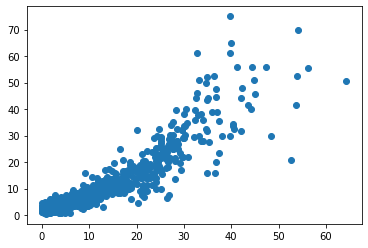

In [53]:
plt.scatter(compare['Pred'], compare['Real'])

# [과제] 회귀 모형을 이용하여 과제용 데이터(실제값이 제거된 데이터) 의 예측치 구하기

> 일부 변수는 본인 의사에 맞게 수정해되 됨

> 변수 선택은 주관적으로 시행해도됨 (불필요하다고 생각되면 제거해도됨)